# Toronto Apartment Evaluation
## by Muhammad Enrizky Brillian
##### Updated May 27, 2023

### 1. Importing Necessary Library

In [1]:
%matplotlib widget
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium

### 2. Description of the Dataset

In [2]:
apartment_data = pd.read_csv("Apartment Building Evaluation.csv",index_col=0)
apartment_data = apartment_data[['SCORE','LATITUDE', 'LONGITUDE','SITE_ADDRESS']].dropna()
apartment_data.head()

,SCORE,LATITUDE,LONGITUDE,SITE_ADDRESS
_id,,,,
3650082,76,43.791511,-79.369045,2 TREE SPARROWAY
3650083,81,43.790920,-79.368771,13 FIELD SPARROWAY
3650084,80,43.791143,-79.368820,15 FIELD SPARROWAY
3650085,83,43.791384,-79.369630,6 TREE SPARROWAY
3650086,79,43.791448,-79.369332,4 TREE SPARROWAY


1. **_id**
   - Unique row identifier for Open Data database

2. **SCORE**
    - This is the overall score of the building. The score is the sum total of each item that was evaluated. The formula to calculate scores is as follows: sum of all assigned scores during the evaluation / (number of unique items reviewed * 5).

3. **LATITUDE**
    - The latitude associated with the building address.

4. **LONGITUDE**
    - The longitude associated with the building address.

### 3. Background of the Data

RentSafeTO: Apartment Building Standards is a bylaw enforcement program established in 2017 to ensure that owners and operators of apartment buildings with three or more storeys or 10 or more units comply with building maintenance standards.

This dataset contains building evaluation scores for buildings registered with RentSafeTO. Buildings must undergo evaluation at least once every three years. During evaluations, Bylaw Enforcement Officers inspect common areas, mechanical and security systems, parking and exterior grounds. Each item is inspected and assigned a score from one to five, with one being the lowest and five being the highest. If an item is not applicable to the building at the time of evaluation, the score will show as blank in the dataset.

### 4. Project Interests

The provided code generates a map visualization of apartment building evaluations based on their scores and locations. The map uses markers to represent each apartment, with marker colors indicating the evaluation score class. The legend provides a key to interpret the colors on the map.

With this code, one could conduct several research inquiries related to apartment building evaluation data. Here are three possible research directions:

1. Spatial Analysis: The map allows researchers to examine the spatial patterns of apartment evaluations across different areas. By analyzing the distribution of marker colors, researchers can identify clusters or hotspots of high or low evaluation scores. This analysis can help identify neighborhoods or regions with consistently high or low-quality apartment buildings. Further investigation into the factors influencing these patterns, such as socioeconomic factors or proximity to amenities, can provide insights for urban planning and policy-making.

2. Comparison of Score Classes: Researchers can compare the distribution of different score classes across the map. This analysis can reveal variations in the quality of apartment buildings in different areas. By examining the concentration of higher or lower score classes, researchers can identify areas with a higher proportion of well-maintained or poorly maintained apartments. This information can be valuable for real estate professionals, renters, and policymakers interested in understanding spatial disparities in housing quality.

3. Temporal Analysis: If the dataset includes a temporal component, researchers can explore changes in apartment evaluations over time. By visualizing the map for different time periods or using interactive features, researchers can observe trends in the spatial distribution of scores and score classes. This analysis can provide insights into the dynamics of housing quality over time, allowing researchers to identify areas that have improved or deteriorated in terms of apartment evaluations. Understanding temporal patterns can contribute to monitoring and improving housing conditions in the city.

In summary, the code provides a starting point for research on apartment building evaluation data, enabling spatial analysis, comparison of score classes, and potential temporal analysis. The map visualization helps researchers gain a visual understanding of apartment evaluations and their spatial patterns, facilitating further investigation into factors influencing housing quality and informing decision-making processes related to housing policies and urban development.

### 5. Analyzing the distribution of apartment location

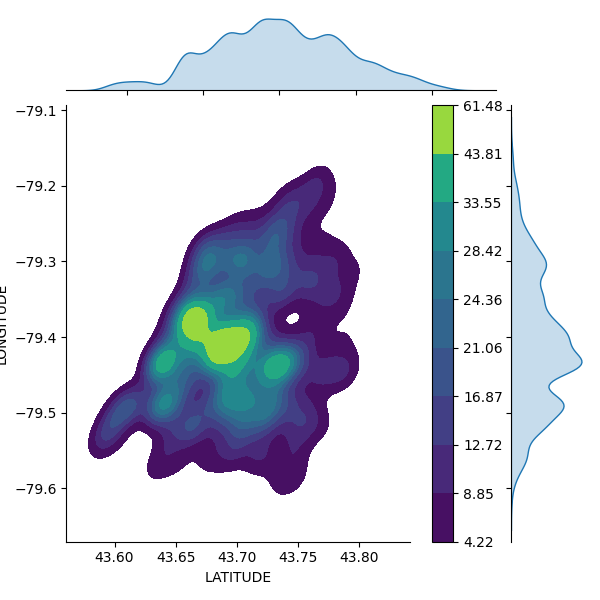

In [9]:
# Calculate the kernel density estimate (KDE)
kde = sns.jointplot(kind='kde',data=apartment_data, x='LATITUDE', y='LONGITUDE', fill=True, cmap='viridis',cbar=True)

In [4]:
# Find the peak of the KDE
peak_density = kde.ax_joint.collections[0].get_paths()[0].vertices.mean(axis=0)
print("Peak density point (LATITUDE, LONGITUDE):", peak_density)

Peak density point (LATITUDE, LONGITUDE): [ 43.70501705 -79.41068568]


From the figure, we can see that the location[43.70501705,-79.41068568] has the most apartment. Thus, we can set the location as the map center.

In [ ]:
# Setting the folium Map
m = folium.Map(location=[43.70501705,-79.41068568],zoom_start=15)

# Create a new column 'SCORE_CLASS' based on 'SCORE' ranges
apartment_data['SCORE_CLASS'] = pd.cut(apartment_data['SCORE'], bins=[0, 20, 40, 60, 80, 100], labels=['E', 'D', 'C', 'B', 'A'])

# Define marker colors for each score class
color_mapping = {'A': 'black', 'B': 'blue', 'C': 'green', 'D': 'red', 'E': 'darkred'}

# Add markers to the map based on apartment locations and score class
for index, row in apartment_data.iterrows():
    latitude = row['LATITUDE']
    longitude = row['LONGITUDE']
    score_class = row['SCORE_CLASS']
    site_address = row['SITE_ADDRESS']
    color = color_mapping.get(score_class,'gray')  # Use gray color as default for unknown score classes
    marker = folium.Marker(location=[latitude, longitude], icon=folium.Icon(color=color),popup=site_address)
    marker.add_to(m)


# Create a custom legend
legend_html = '''
     <div style="position: fixed; 
                 bottom: 50px; left: 50px; width: 120px; height: 120px; 
                 border:2px solid grey; z-index:9999; font-size:14px;
                 background-color:white;
                 ">&nbsp;<b>Legend</b><br>
                 &nbsp;<i class="fa fa-map-marker fa-1x" style="color:black"></i>&nbsp;A<br>
                 &nbsp;<i class="fa fa-map-marker fa-1x" style="color:#36A4D5"></i>&nbsp;B<br>
                 &nbsp;<i class="fa fa-map-marker fa-1x" style="color:#6FAB25"></i>&nbsp;C<br>
                 &nbsp;<i class="fa fa-map-marker fa-1x" style="color:red"></i>&nbsp;D<br>
                 &nbsp;<i class="fa fa-map-marker fa-1x" style="color:darkred"></i>&nbsp;E<br>
     </div>
'''

# Add the legend to the map
m.get_root().html.add_child(folium.Element(legend_html))

# Add layer control to toggle the legend
folium.map.LayerControl().add_to(m)
# Display the Map
display(m)

**Click the Icon to know the apartment Address**

The map represents the distribution of apartment scores across different regions in Toronto, categorized into five score classes: A, B, C, D, and E. 

In examining the data, it can be observed that the highest concentration of apartments with top scores (class A) is found in various regions, such as Beaches-East York, Eglinton-Lawrence, and Toronto-St. Paul's. These regions have a significant number of apartments that have received high evaluations.

Conversely, in terms of lower scores (class E), regions like Scarborough North and Scarborough-Rouge Park exhibit a minimal presence of apartments falling into this category. This suggests that these areas have a relatively lower number of apartments with lower evaluation scores.

The majority of the regions exhibit a moderate distribution of apartments across the score classes (B, C, and D). For instance, regions like Davenport, Don Valley West, and Etobicoke Centre display a substantial number of apartments falling into these intermediate score classes. This indicates a relatively balanced distribution of apartments with average evaluation scores across these areas.

Overall, this map provides an overview of the distribution of apartment scores across different regions in Toronto without mentioning specific numerical values. It highlights the variations in the concentration of apartments across the different score classes, allowing for a qualitative understanding of the evaluation outcomes across different areas of the city.